## **Computational Genomics:** using computational and statistical approaches to derive biological knowledge from genome sequences and related data.   

## **why R?**  
-- the lingua franca of statisitical data analysis  
-- ideal for prototyping and disseminating ideas  
-- publication-quality plotting 
-- very large communities worldwide    
-- Bioconductor provides robust infrastructures for genomic data analysis

## **why not R?**   
-- Not for mission-critical tasks such as implementing algorithms from scratch. Many underlying codes are written in C/C++, Fortran, Java etc.

-- Too many packages, too many choices. So it is your call. 

## **Agenda**  (02-11-2018) 
1. A review on R data structures
2. BioConductor -- Infrastructure for sequence data analysis
3. Brief introduction to alignment data analysis 
4. Mining C. songorica genomes

### Data structures in R

In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
class(iris)

[1] "data.frame"

In [ ]:
hist(iris[,1])

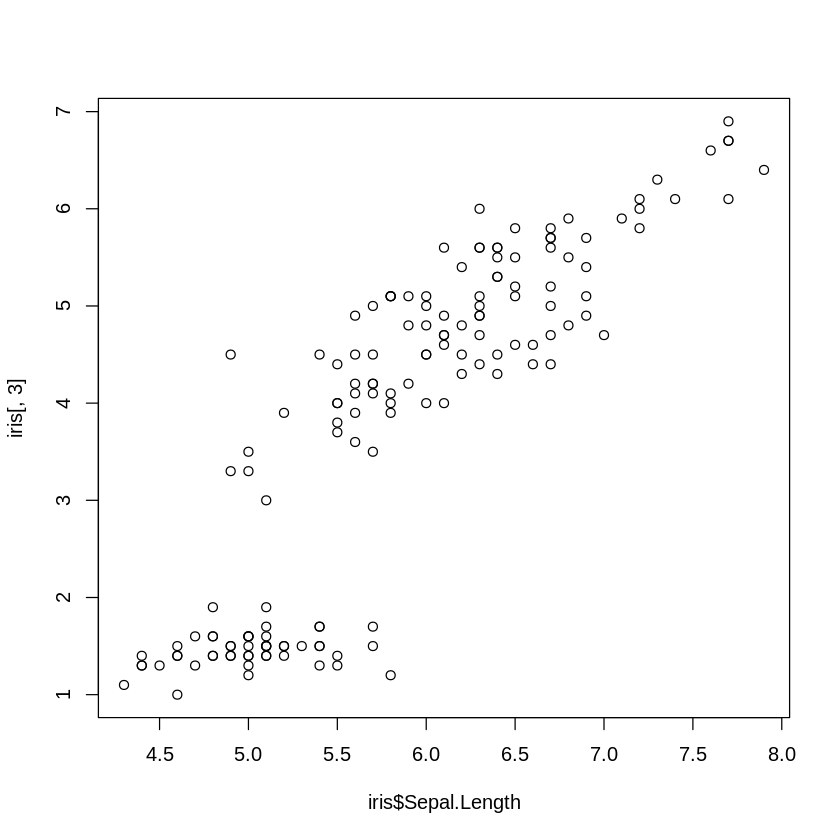

In [3]:
#two ways to select columns from tabular data
plot(iris$Sepal.Length, iris[,3])

## Beyond tabular data -- **list**

In [ ]:
students=list(id=100:103, names=c("John", "Tom", "Linda"), GPA=c(4.5, 4.8, 4.9))

In [ ]:
students$names

In [ ]:
class(students)

In [ ]:
class(students)="Student"
students

In [4]:
mymodel = lm(iris$Sepal.Length ~ iris$Species)
class(mymodel)

[1] "lm"

In [5]:
str(mymodel)

List of 13
 $ coefficients : Named num [1:3] 5.01 0.93 1.58
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "iris$Speciesversicolor" "iris$Speciesvirginica"
 $ residuals    : Named num [1:150] 0.094 -0.106 -0.306 -0.406 -0.006 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ effects      : Named num [1:150] -71.5659 0.8025 7.91 -0.3826 0.0174 ...
  ..- attr(*, "names")= chr [1:150] "(Intercept)" "iris$Speciesversicolor" "iris$Speciesvirginica" "" ...
 $ rank         : int 3
 $ fitted.values: Named num [1:150] 5.01 5.01 5.01 5.01 5.01 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ assign       : int [1:3] 0 1 1
 $ qr           :List of 5
  ..$ qr   : num [1:150, 1:3] -12.2474 0.0816 0.0816 0.0816 0.0816 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:3] "(Intercept)" "iris$Speciesversicolor" "iris$Speciesvirginica"
  .. ..- attr(*, "assign")= int [1:3] 0 1 1
  .. ..- attr(*, "contrasts")=List of 

In [ ]:
mymodel$coefficient

In [ ]:
anova(mymodel)

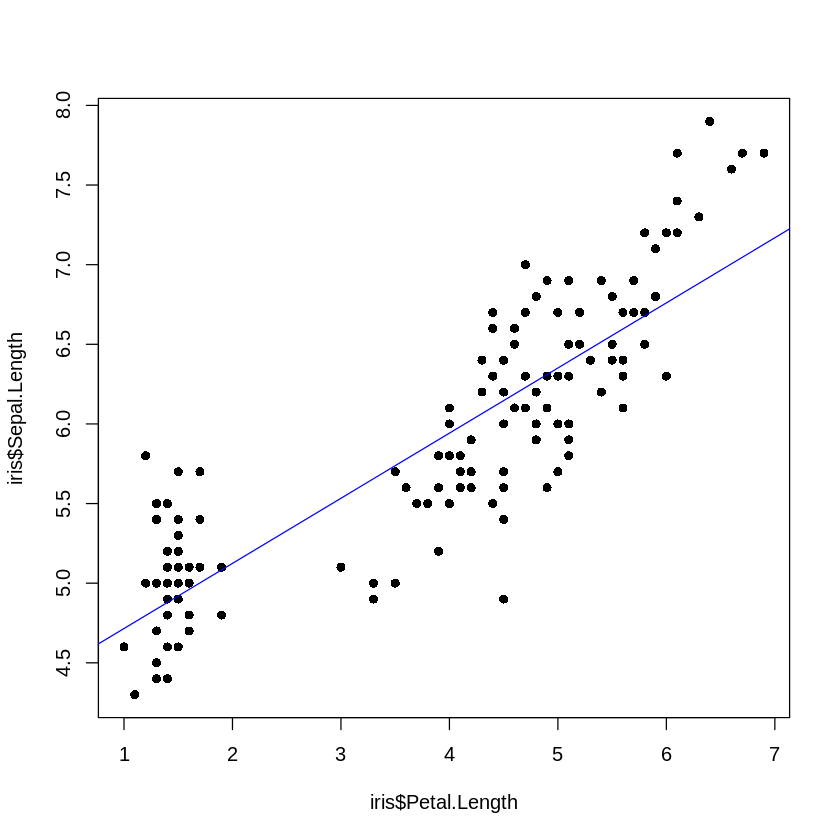

In [6]:
model.1=lm(iris$Sepal.Length ~ iris$Petal.Length)
plot(iris$Sepal.Length ~ iris$Petal.Length, pch=16)
abline(model.1, col="blue")

In [7]:
#"factor" is first class data type in R 
class(iris$Species)

[1] "factor"

## S3 and S4
S3 and S4 is OOP style in R. As shown S3 is just a list and ad-hoc, [S4 class](https://adv-r.hadley.nz/s4.html) is more formal OOP system. Formal requirements must be met in design but what do we need to know as a user? <br>
S4 is widely used in BioConductor. Here is some useful information to understanding of its concepts. <br>
https://www.stat.auckland.ac.nz/S-Workshop/Gentleman/S4Objects.pdf <br>
https://www.datamentor.io/r-programming/s4-class/

In [ ]:
setClass("student", slots=list(id="integer", name="character", GPA="numeric"))

In [ ]:
new("student", id=101L, name="John", GPA=4.5)

In [ ]:
s=new("student", id=101L, name="John", GPA=4.5)
isS4(s)

In [ ]:
#extract field information
s@name

## Genomics data
1. Nothing but {A, T, C, G, N}
2. Search/find patterns in general
3. Predicting genes -- start/stop, exon, intron etc. resort to dedicated algorithms 

## Characters/Strings

In [9]:
#String or Character is the basic structure in R. Many functions for manipulating strings can be readily applied to DNAString (see below)
base = c("A","C","T","G")
seq = paste(base, collapse="")
bases = sample(base, 1000, replace=TRUE)
gene=paste(bases, collapse="")
names(gene)="> random gene"
gene

> random gene 
"AGGCCTCGATTCTATCCAACGCACCCTACCAGCCGAGCAACTGATCTTCGACATGTGCGATTACGTCTTGAACGCGGGACAATCGACAAAACCTGGAACAATTCGTTCATTAAGGGTCCTCGGGGCGTTCTTTAATATGAAATGCTAATGCCTCCAATACGTTCAGGAGGAGCGCCAGGCACCAGGGTCTCGACTAGCTTGTATCTTGCCGATAAAGACGAAGAACCCATTCTTATCTAAGCCCATGACCTTAACCATGTTCACGGCATCTGATTACAAAGTGTTCGGTGCCCTTGAGAACAATAACTTCGATTGGGAGCATCGGTCCTCTCCTCCCACCCGTCATATAATAGTTATTGTGGTCGGAAGAGACAGGAAATGTACGGTAAGTAAACCGAATATTTGCGGTCTTCTAGGCGGATAACAGGCGTTTACCCAAATTCGTACAAGCCGCCACTAATTTTCACCTTCCCCCATTCATGGCACTGTCTAGATTGACTTACTCCGTCAGAGTCCTTATTCATGCCACGCGAATAAATTGCATGGGCCGAAAACTATAGAAATGGATGTTTAGTATGGAGGGACTGGCTGTCAGCTGACACGGTTGACGCCACTGATGGCGACAATTCTACCTAACGAATGTCCTAGCCTCCTCATTGTCTCAGGTGATGACAACGGCGTTTCTATTCGAGTCGGCGGCCACGGCCACTGGTCATCCGGCTGATTTAAGACAACAGAGAGGTGTTTACCACAGTAAAATCAACTGTTTGATCCATTCGCAAGAGCTCTAGTGATCGTAGAAAGACGTAATGTGGGCAGTCAGACTTACGGTGACGCAAGTTCCCCCAACGTTGACAACTAACGTATATCGTTAGCCGGGTTTAATTTTCGACTCTCGCTCTTTCGGGAGGATCAGCCCAGCCACCCATGGGCGCCAATATTGTGTGGAAATCGGATAAAGCCGTTTGATGATCTGCTTCTTAGGACGAGTTTCTCCGCT"

In [56]:
#ApeKI 
grep("GCAGC", gene)

[1] 1

## Sequence data structure and analysis in BioC
### XString for single sequence; XStringSet for multiple sequences
- DNAString
- RNAString
- AAString
- BString

In [ ]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("Biostrings")
library(Biostrings)

In [12]:
dnastring = DNAString("TTGAA-CTC-N")
class(dnastring)

[1] "DNAString"
attr(,"package")
[1] "Biostrings"

In [13]:
slotNames(dnastring)

[1] "shared"          "offset"          "length"          "elementMetadata"
[5] "metadata"

In [14]:
showMethods(class="DNAString")


Function ".replaceSEW":
 <not an S4 generic function>
Function: alphabetFrequency (package Biostrings)
x="DNAString"


Function "asJSON":
 <not an S4 generic function>
Function: codons (package Biostrings)
x="DNAString"

Function: coerce (package methods)
from="character", to="DNAString"
from="DNAString", to="MaskedDNAString"
from="MaskedDNAString", to="DNAString"
from="XString", to="DNAString"


Function "column<-":
 <not an S4 generic function>

Function "commonColnames":
 <not an S4 generic function>
Function: complement (package Biostrings)
x="DNAString"

Function: countPWM (package Biostrings)
subject="DNAString"


Function "dups":
 <not an S4 generic function>
Function: findPalindromes (package Biostrings)
subject="DNAString"

Function: hasOnlyBaseLetters (package Biostrings)
x="DNAString"


Function "loadSequence":
 <not an S4 generic function>

Function "ls":
 <not an S4 generic function>
Function: matchProbePair (package Biostrings)
subject="DNAString"

Function: matchPWM (pa

In [ ]:
dnastring

In [15]:
print(GENETIC_CODE)

TTT TTC TTA TTG TCT TCC TCA TCG TAT TAC TAA TAG TGT TGC TGA TGG CTT CTC CTA CTG 
"F" "F" "L" "L" "S" "S" "S" "S" "Y" "Y" "*" "*" "C" "C" "*" "W" "L" "L" "L" "L" 
CCT CCC CCA CCG CAT CAC CAA CAG CGT CGC CGA CGG ATT ATC ATA ATG ACT ACC ACA ACG 
"P" "P" "P" "P" "H" "H" "Q" "Q" "R" "R" "R" "R" "I" "I" "I" "M" "T" "T" "T" "T" 
AAT AAC AAA AAG AGT AGC AGA AGG GTT GTC GTA GTG GCT GCC GCA GCG GAT GAC GAA GAG 
"N" "N" "K" "K" "S" "S" "R" "R" "V" "V" "V" "V" "A" "A" "A" "A" "D" "D" "E" "E" 
GGT GGC GGA GGG 
"G" "G" "G" "G" 
attr(,"alt_init_codons")
[1] "TTG" "CTG"


In [16]:
print(AMINO_ACID_CODE)

    A     R     N     D     C     Q     E     G     H     I     L     K     M 
"Ala" "Arg" "Asn" "Asp" "Cys" "Gln" "Glu" "Gly" "His" "Ile" "Leu" "Lys" "Met" 
    F     P     S     T     W     Y     V     U     O     B     J     Z     X 
"Phe" "Pro" "Ser" "Thr" "Trp" "Tyr" "Val" "Sec" "Pyl" "Asx" "Xle" "Glx" "Xaa" 


In [12]:
#Translation with real examples -- change the data file and the path to play 
cds=readDNAStringSet("data/Cs.gene.cds")
cds

  A DNAStringSet instance of length 54383
        width seq                                           names               
    [1]  1188 ATGTCGCTCTCATTTGGAGTC...TTTCAGACATTTAGTTATTAA CCG000001.1  [mRN...
    [2]   633 ATGGCGGCGACTTCGGCTAGC...ACGATGAGATTAAGTCCATAA CCG000002.1  [mRN...
    [3]  1434 ATGGCCATCTACGAGCAGGTC...TTCCCCTGCTTCAAAGCATAG CCG000003.1  [mRN...
    [4]  1287 ATGGTGGACGCAGTGTTCCAG...TTGGTTGCTGATGAGCACTGA CCG000004.1  [mRN...
    [5]   633 ATGGCTGCTGGCGACGAGAAG...CCAGAAAGCGCTAGCGTCTAG CCG000005.1  [mRN...
    ...   ... ...
[54379]   582 ATGATCGACCGCCTCCACCAG...CAAGTTATTATTAGCGTCTAG CCG002930.1  [mRN...
[54380]  1284 ATGTCTCCGCCGCCCGGATCC...GAGTGCACTGTTATCAAATGA CCG002931.1  [mRN...
[54381]  1329 ATGGCGGCGGCGTCCGTCGTC...GCCATAACAAAGCAATCATAG CCG002932.1  [mRN...
[54382]   966 ATGGCGTCCGACGGCAACGGC...TTCGCGGCCCGCTCCGAGTAG CCG002933.1  [mRN...
[54383]  1218 ATGCATATGGAGGGATCCAGC...CCATCTGCGCCCAAAATGTAG CCG002934.1  [mRN...

In [ ]:
class(cds)

In [13]:
pep1=translate(cds[[1]])
pep1

  396-letter "AAString" instance
seq: MSLSFGVCQPALGWGGDFVLAQARGAFEVLSQTIQA...NNFYREVCVYFHFGFFLIFSYVDGILSHNFQTFSY*

In [14]:
pep1[-396]

  395-letter "AAString" instance
seq: MSLSFGVCQPALGWGGDFVLAQARGAFEVLSQTIQA...VNNFYREVCVYFHFGFFLIFSYVDGILSHNFQTFSY

In [15]:
pepI=readAAStringSet("data/Cs.gene.pep")[[1]]
pepI

  395-letter "AAString" instance
seq: MSLSFGVCQPALGWGGDFVLAQARGAFEVLSQTIQA...VNNFYREVCVYFHFGFFLIFSYVDGILSHNFQTFSY

In [16]:
pred1=pep1[-396]
pred1==pepI

[1] TRUE

## Ryegrass FT3 gene 
to download genes from GenBank with accession numbers <br>
https://www.ncbi.nlm.nih.gov/nuccore/DQ309592

In [1]:
getwd()

[1] "/home/mingshu/notes"

In [4]:
#install.packages("ape")
library(ape)
seq=read.GenBank("DQ309592")
seq

1 DNA sequence in binary format stored in a list.

Sequence length: 1340 

Label:
DQ309592

Base composition:
    a     c     g     t 
0.260 0.257 0.229 0.254 

In [ ]:
str(seq)
attributes(seq)                                             #metadata
#write.dna(seqs, file="ft3.fa", format="fasta", colsep="")

In [18]:
#read the whole genome in Fasta into R
#Please change the path to your data to test this
csGenome = readDNAStringSet("~/csGenome/cs18/Lachesis_assembly_changed.fa")
csGenome

  A DNAStringSet instance of length 512
         width seq                                          names               
  [1] 36730093 CTCCCATCTTTTATACTTATT...CCATCCCCCACCCCCCCCCC Lachesis_group01
  [2] 35137460 CTAACCCTAAACCCTAACCCT...CCCTGTTTTGATAGGATTTT Lachesis_group02
  [3] 34124666 TAAACCTAAACCCTAAACCCT...GAACTCTTCAATAATTTATT Lachesis_group03
  [4] 31471377 AAACCCTAAACCCTAAACCCT...TTAGGGTTAGGGTTTAGCGG Lachesis_group04
  [5] 31725061 AAATCCTGAGAAACATGCAAA...AGATCTTCCTTTGAGCCATA Lachesis_group05
  ...      ... ...
[508]    14214 TGTGGAGTGGGAGCTACGCTG...CGCACACGTGTCGTGTTATC Scaffold_994 uncl...
[509]     2791 TATTCAAATGTGCGACGCGCC...TGCCCTAGCTACCCGCCGGC Scaffold_1068 unc...
[510]    14426 TCGTGGTGCTGCTATACATTG...GAGCGAGTTCAACTCTTTCC Scaffold_978 uncl...
[511]     3229 CTCTCTCTCTCTCTCTCTCTC...GTAGCTCGCCCCCCCCCCCC Scaffold_1091 unc...
[512]     5237 CACCACCACCTCGCCATGCTC...GGAAGTCGAGGCTGAGCACC Scaffold_1043 unc...

In [18]:
names(csGenome)[1:20]

[1] "Lachesis_group01" "Lachesis_group02" "Lachesis_group03" "Lachesis_group04"
 [5] "Lachesis_group05" "Lachesis_group06" "Lachesis_group07" "Lachesis_group08"
 [9] "Lachesis_group09" "Lachesis_group10" "Lachesis_group11" "Lachesis_group12"
[13] "Lachesis_group13" "Lachesis_group14" "Lachesis_group15" "Lachesis_group16"
[17] "Lachesis_group17" "Lachesis_group18" "Lachesis_group19" "Lachesis_group20"

width(csGenome)

In [21]:
class(csGenome)
chrs=csGenome[1:20]
names(chrs)=paste("chr", 1:20, sep="")
names(csGenome)[1:20]=paste("chr", 1:20, sep="")
csGenome

[1] "DNAStringSet"
attr(,"package")
[1] "Biostrings"

  A DNAStringSet instance of length 512
         width seq                                          names               
  [1] 36730093 CTCCCATCTTTTATACTTATT...CCATCCCCCACCCCCCCCCC chr1
  [2] 35137460 CTAACCCTAAACCCTAACCCT...CCCTGTTTTGATAGGATTTT chr2
  [3] 34124666 TAAACCTAAACCCTAAACCCT...GAACTCTTCAATAATTTATT chr3
  [4] 31471377 AAACCCTAAACCCTAAACCCT...TTAGGGTTAGGGTTTAGCGG chr4
  [5] 31725061 AAATCCTGAGAAACATGCAAA...AGATCTTCCTTTGAGCCATA chr5
  ...      ... ...
[508]    14214 TGTGGAGTGGGAGCTACGCTG...CGCACACGTGTCGTGTTATC Scaffold_994 uncl...
[509]     2791 TATTCAAATGTGCGACGCGCC...TGCCCTAGCTACCCGCCGGC Scaffold_1068 unc...
[510]    14426 TCGTGGTGCTGCTATACATTG...GAGCGAGTTCAACTCTTTCC Scaffold_978 uncl...
[511]     3229 CTCTCTCTCTCTCTCTCTCTC...GTAGCTCGCCCCCCCCCCCC Scaffold_1091 unc...
[512]     5237 CACCACCACCTCGCCATGCTC...GGAAGTCGAGGCTGAGCACC Scaffold_1043 unc...

In [ ]:
methods(class="DNAStringSet")

In [19]:
#hopefully, you can figure out to calculate the GC content of the genome
alphabetFrequency(csGenome)

A,C,G,T,M,R,W,S,Y,K,V,H,D,B,N,-,+,.
10072109,8294054,8284654,10068567,0,0,0,0,0,0,0,0,0,0,10709,0,0,0
9669824,7914052,7906969,9638449,0,0,0,0,0,0,0,0,0,0,8166,0,0,0
9345370,7722058,7716338,9332580,0,0,0,0,0,0,0,0,0,0,8320,0,0,0
8600828,7123101,7118740,8620865,0,0,0,0,0,0,0,0,0,0,7843,0,0,0
8697572,7178090,7169038,8673557,0,0,0,0,0,0,0,0,0,0,6804,0,0,0
8613305,7113030,7094548,8632668,0,0,0,0,0,0,0,0,0,0,8016,0,0,0
8506047,7063861,7054067,8491125,0,0,0,0,0,0,0,0,0,0,9880,0,0,0
8257498,6816123,6826409,8278023,0,0,0,0,0,0,0,0,0,0,8436,0,0,0
7132022,5886580,5900930,7123650,0,0,0,0,0,0,0,0,0,0,7606,0,0,0
7296333,5920110,5926614,7275480,0,0,0,0,0,0,0,0,0,0,6952,0,0,0


In [53]:
#modify data and save to a new version
#chrs=cs[1:20]
#names(chrs)=paste("chr", 1:20, sep="")
scaffolds=csGenome[21:512]
chrU=unlist(scaffolds)
chrU=DNAStringSet(chrU)
names(chrU)="chrUn"
writeXStringSet(c(chrs, chrU), file="Csongorica_test.fa", width=80)

In [54]:
getwd()


[1] "/home/mingshu/csGenome/GT"

In [ ]:
names(ft)

In [ ]:
length(ft[[1]])

In [ ]:
#need to get cds before doing translation
#translate(ft[[1]])

## Manipulate genome range data
- An excellent introduction on range data
- https://www.bioconductor.org/help/course-materials/2014/SeattleOct2014/A01.3_BioconductorForSequenceAnalysis.html

In [ ]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("rtracklayer")

In [ ]:
library(rtracklayer)   
gff=import("~/csGenome/cs18/Chr_genome_final_gene.gff3")
#gff
gff.mRNA=gff[gff$type=="mRNA",]
#gff.mRNA
gff.mRNA

In [39]:
gff.mRNA

GRanges object with 54383 ranges and 10 metadata columns:
                  seqnames             ranges strand |   source     type
                     <Rle>          <IRanges>  <Rle> | <factor> <factor>
      [1] Lachesis_group09 [1955497, 1975493]      - |    GLEAN     mRNA
      [2] Lachesis_group09 [1981235, 1982608]      - |    GLEAN     mRNA
      [3] Lachesis_group09 [1984793, 1991299]      + |    GLEAN     mRNA
      [4] Lachesis_group09 [2110650, 2112184]      + |     Cuff     mRNA
      [5] Lachesis_group09 [2159427, 2160059]      - |    GLEAN     mRNA
      ...              ...                ...    ... .      ...      ...
  [54379]     Scaffold_992       [2337, 2968]      - |    GLEAN     mRNA
  [54380]     Scaffold_992       [5907, 7220]      + |    GLEAN     mRNA
  [54381]     Scaffold_995       [6867, 8896]      + |    GLEAN     mRNA
  [54382]     Scaffold_996       [3373, 8161]      - |    GLEAN     mRNA
  [54383]     Scaffold_998       [7844, 9459]      + |    GLEAN   

In [40]:
class(gff)

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

In [44]:
gff.mRNA[1]


GRanges object with 1 range and 10 metadata columns:
              seqnames             ranges strand |   source     type     score
                 <Rle>          <IRanges>  <Rle> | <factor> <factor> <numeric>
  [1] Lachesis_group09 [1955497, 1975493]      - |    GLEAN     mRNA  0.670748
          phase          ID             source_id          Parent  support_id
      <integer> <character>           <character> <CharacterList> <character>
  [1]      <NA> CCG000001.1 genome_GLEAN_10048627                        <NA>
      part_support_id identical_support_id
          <character>          <character>
  [1]            <NA>                 <NA>
  -------
  seqinfo: 377 sequences from an unspecified genome; no seqlengths

In [51]:
chr10=csGenome[[10]]
frag=chr10[1955497:1975493]
length(frag)
1955497-1975493

[1] 19997

[1] -19996

In [ ]:
methods(class="GRanges")


In [20]:
#methods(class="GRanges")
seqinfo(gff)

Seqinfo object with 377 sequences from an unspecified genome; no seqlengths:
  seqnames                  seqlengths isCircular genome
  Lachesis_group01                <NA>       <NA>   <NA>
  Lachesis_group02                <NA>       <NA>   <NA>
  Lachesis_group03                <NA>       <NA>   <NA>
  Lachesis_group04                <NA>       <NA>   <NA>
  Lachesis_group05                <NA>       <NA>   <NA>
  ...                              ...        ...    ...
  Scaffold_995                    <NA>       <NA>   <NA>
  Scaffold_996                    <NA>       <NA>   <NA>
  Scaffold_998                    <NA>       <NA>   <NA>
  Scaffold_99_ERROPOS103921       <NA>       <NA>   <NA>
  Scaffold_99_ERROPOS207871       <NA>       <NA>   <NA>

In [21]:
unique(mcols(gff)$type)

[1] gene  mRNA  CDS   UTR_5 UTR_3
Levels: gene mRNA CDS UTR_5 UTR_3

In [9]:
isS4(gff)

[1] TRUE

In [10]:
slotNames(gff)

[1] "seqnames"        "ranges"          "strand"          "elementMetadata"
[5] "seqinfo"         "metadata"

In [11]:
gff@seqnames[1:5]

factor-Rle of length 5 with 1 run
  Lengths:    5
  Values : Chr1
Levels(401): Chr1 Chr10 Chr11 Chr12 ... contig99 contig997 contig998 contig999

In [ ]:
gff

In [25]:
#biocLite("ggbio")
library("ggbio")

Loading required package: ggplot2
Warning message in read.dcf(con):
“URL 'http://bioconductor.org/BiocInstaller.dcf': status was 'Couldn't resolve host name'”Need specific help about ggbio? try mailing 
 the maintainer or visit http://tengfei.github.com/ggbio/

Attaching package: 'ggbio'

The following objects are masked from 'package:ggplot2':

    geom_bar, geom_rect, geom_segment, ggsave, stat_bin, stat_identity,
    xlim



In [26]:
gene1=gff[which(unlist(gff$Parent) == "CCG002482.1")]
gene1

GRanges object with 22 ranges and 10 metadata columns:
               seqnames               ranges strand |   source     type
                  <Rle>            <IRanges>  <Rle> | <factor> <factor>
   [1] Lachesis_group12 [11631752, 11632335]      + |    GLEAN      CDS
   [2] Lachesis_group12 [11632551, 11632926]      + |    GLEAN      CDS
   [3] Lachesis_group12 [11636625, 11640194]      - |     Cuff     gene
   [4] Lachesis_group12 [11636625, 11640194]      - |     Cuff     mRNA
   [5] Lachesis_group12 [11640161, 11640194]      - |     Cuff    UTR_5
   ...              ...                  ...    ... .      ...      ...
  [18] Lachesis_group12 [11643808, 11643912]      - |    GLEAN      CDS
  [19] Lachesis_group12 [11643690, 11643735]      - |    GLEAN      CDS
  [20] Lachesis_group12 [11646003, 11649306]      + |    GLEAN     gene
  [21] Lachesis_group12 [11646003, 11649306]      + |    GLEAN     mRNA
  [22] Lachesis_group12 [11646003, 11646221]      + |    GLEAN      CDS
         

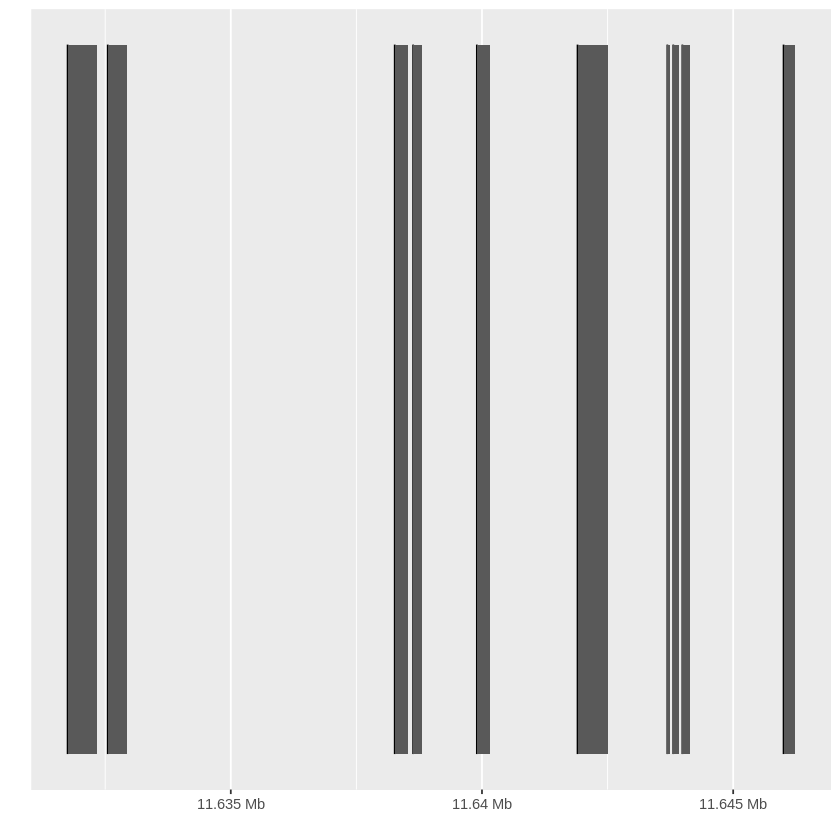

In [27]:
autoplot(gene1[gene1$type=="CDS"], gap.geom = "chevron")
#autoplot(ft3.cds, gap.geom = "segment")

## Fastq 
-- although many R BioC packages are available to handle Fastq but can be challenging for real-world data

In [12]:
fq=read.table(gzfile("data/C05F2ACXX_5_fastq.gz"), header=F)

In [16]:
fq[1:4,]

[1] @HWI-ST2229051101501433901                                                       
[2] CGGTAGACAGCGTGATTATCACCATTCTTTTTTTATAGGGTTTGTTTTTGAGTAAAGCTCTCAAGAATAGGAGAAATATTG
[3] +HWI-ST2229051101501433901                                                       
[4] abbceeeeggfgggghihiiiiihhighiiiiiiaffghicghhhiiiiidgghfhggggggeeeeeddccbdacbccbc`
11754 Levels: ___\\`YYceecaaedcdeghg[ebfdedaa```[ed^^IOa[^ceccddehebR\\MW__VMVbdedaZ\\^]aBBBBBBBBB ...

## Manipulate alignment data
### - global alignment, ClustalW
### - pairwise local alignment, Smith-Waterman algorithm
### - model-based alignment
### - BLAST (Altschul et al. 1990)
### - short reads alignment

In [28]:
setwd("~/csGenome/GT")
#list.files()
blast.outfile="GTpep_AOCS.blast"      #Arabidopsis/rice GTs as query
blast=read.table(blast.outfile, sep="\t")
colnames(blast)=c("qid", "sid", "pident", "alignlen", "mismatch", "gapcount", "qstart", "qend", "sstart", "send","evalue","bitscore")
dim(blast)                       
head(blast)                      

[1] 28332    12

qid,sid,pident,alignlen,mismatch,gapcount,qstart,qend,sstart,send,evalue,bitscore
sp|Q6F2Z1|STT3A_ORYSJ,CCG027040.1,94.110,798,36,2,1,787,1,798,0.00,1535.0
sp|Q6F2Z1|STT3A_ORYSJ,CCG021916.1,89.086,788,36,4,1,787,1,739,0.00,1396.0
sp|Q6F2Z1|STT3A_ORYSJ,CCG042496.1,53.701,743,277,12,29,759,32,719,0.00,731.0
sp|Q6F2Z1|STT3A_ORYSJ,CCG005292.1,48.925,744,259,15,28,759,31,665,0.00,598.0
sp|Q6F2Z1|STT3A_ORYSJ,CCG032010.1,35.821,67,34,3,453,515,90,151,0.65,33.5
sp|Q6F2Z1|STT3A_ORYSJ,CCG015902.1,24.074,108,73,3,496,603,217,315,3.50,31.6


In [29]:
summary(blast$pident)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.96   26.95   29.78   31.33   33.98   95.69 

In [31]:
sum(blast$pident>40)             #
summary(blast$alignlen)          #median=250
blast=blast[blast$pident>40 && blast$alignlen>100] #250 for DNA
#table(blast$sid)
length(unique(blast$sid))

[1] 2429

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   12.0   159.0   299.0   302.1   469.0   798.0 

[1] 1225

In [33]:
source("~/csGenome/util.R")
blast2grange

function (blast) 
{
    library(GenomicRanges)
    sstrand = ifelse(blast$sstart < blast$send, "+", "-")
    print(table(sstrand))
    qr.start = ifelse(blast$sstart < blast$send, blast$sstart, 
        blast$send)
    qr.end = ifelse(blast$sstart < blast$send, blast$send, blast$sstart)
    IR = IRanges(start = qr.start, end = qr.end)
    gr = GRanges(seqnames = as.character(blast$sid), ranges = IR, 
        strand = sstrand)
    gr
}

In [5]:
source("~/csGenome/util.R")
gtBlast=(blast)
gtBlast                          

sstrand
    + 
28332 


GRanges object with 28332 ranges and 0 metadata columns:
             seqnames      ranges strand
                <Rle>   <IRanges>  <Rle>
      [1] CCG027040.1   [ 1, 798]      +
      [2] CCG021916.1   [ 1, 739]      +
      [3] CCG042496.1   [32, 719]      +
      [4] CCG005292.1   [31, 665]      +
      [5] CCG032010.1   [90, 151]      +
      ...         ...         ...    ...
  [28328] CCG004415.1 [ 20,   64]      +
  [28329] CCG004054.3 [274,  310]      +
  [28330] CCG033537.3 [535,  566]      +
  [28331] CCG019487.1 [939, 1030]      +
  [28332] CCG046740.1 [346,  367]      +
  -------
  seqinfo: 1225 sequences from an unspecified genome; no seqlengths

In [7]:
library(rtracklayer)   #deal with BED, GTF, WIG
#gff=import("./cs18/Lachesis_order_changed.gff")
gff=import("~/csGenome/cs18/Chr_genome_final_gene.gff3")
mcols(gff)

DataFrame with 409426 rows and 10 columns
         source     type     score     phase          ID             source_id
       <factor> <factor> <numeric> <integer> <character>           <character>
1         GLEAN     gene  0.670748        NA CCG000001.1 genome_GLEAN_10048627
2         GLEAN     mRNA  0.670748        NA CCG000001.1 genome_GLEAN_10048627
3         GLEAN      CDS        NA         0          NA                    NA
4         GLEAN      CDS        NA         1          NA                    NA
5         GLEAN      CDS        NA         2          NA                    NA
...         ...      ...       ...       ...         ...                   ...
409422    GLEAN     gene  0.999995        NA CCG054383.1 genome_GLEAN_10000030
409423    GLEAN     mRNA  0.999995        NA CCG054383.1 genome_GLEAN_10000030
409424    GLEAN      CDS        NA         0          NA                    NA
409425    GLEAN      CDS        NA         0          NA                    NA
409426    

In [11]:
gff=gff[gff$type=="CDS",]
gff1=gff[width(gff)>300]     #the same as Lp
gff1                         #377 in Cs (Glean), and 1893 in Lp (Augustus)

GRanges object with 55888 ranges and 10 metadata columns:
                  seqnames             ranges strand |   source     type
                     <Rle>          <IRanges>  <Rle> | <factor> <factor>
      [1] Lachesis_group09 [1981235, 1981554]      - |    GLEAN      CDS
      [2] Lachesis_group09 [1984793, 1985208]      + |    GLEAN      CDS
      [3] Lachesis_group09 [1986565, 1986954]      + |    GLEAN      CDS
      [4] Lachesis_group09 [1990956, 1991299]      + |    GLEAN      CDS
      [5] Lachesis_group09 [2110825, 2112111]      + |     Cuff      CDS
      ...              ...                ...    ... .      ...      ...
  [55884]     Scaffold_992       [6714, 7220]      + |    GLEAN      CDS
  [55885]     Scaffold_995       [7076, 7642]      + |    GLEAN      CDS
  [55886]     Scaffold_995       [7775, 8896]      + |    GLEAN      CDS
  [55887]     Scaffold_996       [3628, 4575]      - |    GLEAN      CDS
  [55888]     Scaffold_998       [8576, 9459]      + |    GLEAN   

In [ ]:
hits=findOverlaps(gtBlast, gff1)
hits
#w=gff[subjectHits(hits)]
#cds=unique(w)                #404 GT cds, 487 in Cs